### Treat wrong data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'age':[15,18,'18',19.4,'20+'],'Gender':['M',"F",'F','F','M']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [3]:
df

,age,Gender
0,15,M
1,18,F
2,18,F
3,19.4,F
4,20+,M


In [4]:
df.age.unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

In [5]:
df.age = df.age.replace({'20+':20})
df

,age,Gender
0,15,M
1,18,F
2,18,F
3,19.4,F
4,20,M


### treat wrong data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [7]:
df.age = df.age.astype(int) # convert type of a columns 

In [8]:
df

,age,Gender
0,15,M
1,18,F
2,18,F
3,19,F
4,20,M


### Duplicates

In [9]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [10]:
df[df.duplicated()]

,age,Gender
2,18,F


In [11]:
df.duplicated().sum()

1

In [12]:
df[~df.duplicated()]

,age,Gender
0,15,M
1,18,F
3,19,F
4,20,M


In [13]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [17]:
df.drop_duplicates(inplace = True,ignore_index = True)
df

,age,Gender
0,15,M
1,18,F
2,19,F
3,20,M


### missing values

In [60]:
df  = pd.DataFrame({'age':[12,24,22,33,32,np.nan],'gender':['M',np.nan,'F','F',"M",np.nan]})
df

,age,gender
0,12.0,M
1,24.0,NaN
2,22.0,F
3,33.0,F
4,32.0,M
5,NaN,NaN


In [61]:
(df.isnull().sum()*100)/(df.shape[0]) # null values persentage 

age       16.666667
gender    33.333333
dtype: float64

In [62]:
df.isnull().sum()

age       1
gender    2
dtype: int64

In [66]:
df2 = df.dropna() # it delete the rows where misssing values is avaliable
df2

,age,gender
0,12.0,M
2,22.0,F
3,33.0,F
4,32.0,M


In [81]:
df.drop(columns = ['gender'],inplace = True)

In [82]:
df

,age
0,12.0
1,24.0
2,22.0
3,33.0
4,32.0
5,24.6


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
df['age'].fillna(df.age.mean(),inplace = True)

In [85]:
df

,age
0,12.0
1,24.0
2,22.0
3,33.0
4,32.0
5,24.6


### outlire

In [94]:
df = pd.DataFrame({'num':[12,13,14,16,18,17,15,11,25]})
df

,num
0,12
1,13
2,14
3,16
4,18
5,17
6,15
7,11
8,25


<Axes: ylabel='num'>

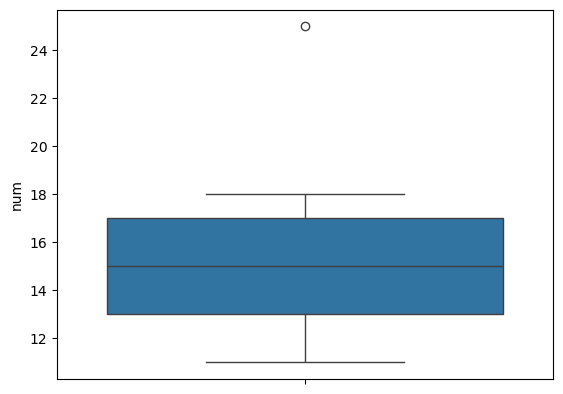

In [95]:
sns.boxplot(df.num)

In [96]:
import seaborn as sns

In [100]:
q1 = df.num.quantile(0.25)
q1

13.0

In [102]:
q3 = df.num.quantile(0.75)
q3

17.0

In [104]:
iqr = q3-q1
iqr

4.0

In [106]:
lower_limit = q1 - (1.5*iqr)
lower_limit

7.0

In [107]:
upper_limit = q3 + (1.5*iqr)
upper_limit

23.0

In [126]:
df.num>upper_limit

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
Name: num, dtype: bool

In [130]:
df[(df.num>upper_limit) | (df.num<lower_limit)].index

Index([8], dtype='int64')

In [134]:
df.drop(index=[8],inplace = True)

In [135]:
df

,num
0,12
1,13
2,14
3,16
4,18
5,17
6,15
7,11


In [140]:
df.num = df['num'].clip(lower= 7.0,upper=23.0)
df

,num
0,12
1,13
2,14
3,16
4,18
5,17
6,15
7,11
